In [1]:
from src.data.esophagus.esophagus_data import EsophagusData
from src.preprocess import get_preprocessed_data
from src.utils.feature_selector import FeatureSelector
import numpy as np
import pandas as pd

In [2]:
data = EsophagusData()
data.parse(drop_columns=True, feature_set=None, drop_missing_value=0, exploration=False, external_validation=True)
X, Y = get_preprocessed_data(data, verbose=False, validation=False)
X_val, Y_val = get_preprocessed_data(data, verbose=False, validation=True)
print(X_val.columns.difference(X.columns))
# Get rid of extra columns introduced by values in validation dataset
X_val = X_val.drop(set(X_val.columns.difference(X.columns)), axis=1)

[]
['Sex', 'AI gesamt', 'ZNS_NE', 'Sonnen-scheindauer[h]', 'Herzrhythmusstörung', 'inabitity_CTX_within _6weeks', 'Gamma-GT', 'Pylorusstenose', 'inability_ CTX_within_4weeks', 'Diabetes', 'Autoimmunerkrankung', 'paVk', 'Herzinsuffizienz', 'aHt', 'Hepatose', 'Re-Admission ICU', 'Gerinnungsstörung', 'MittlereTemp.[°C]', 'Gewicht in kg', 'Infektionserkrankung', 'Pneumonie', 'KHK', 'Nieder-schlag[l/m2]', 'Lungenerkrankung', 'Herzklappenerkrankung']
['Any_malignancy', 'Diabetes_without_chronic_complications']
2 features with a single unique value.

[]
0 features with greater than 0.50 missing values.

2 features with a correlation greater than 0.95.

['Hämatokrit', 'HIV_infection_no_AIDS']
Removed 4 features
['Histologie', 'Lokalisation', 'Vorbehandlung', 'Tpre', 'Npre', 'ASA', 'GFR']
Running IterativeImputer...


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Normalising numerical features...
Class distributions for 409 data points, validation=False:
Endpoint Death_within_primary_stay:
	Class "0":	392 (0.958)
	Class "1":	17 (0.042)


Endpoint 30d_mortality:
	Class "0":	400 (0.978)
	Class "1":	9 (0.022)


Endpoint 90d_mortality:
	Class "0":	391 (0.956)
	Class "1":	18 (0.044)


['Any_malignancy', 'Diabetes_without_chronic_complications']
2 features with a single unique value.

[]
0 features with greater than 0.50 missing values.

2 features with a correlation greater than 0.95.

['Hämatokrit', 'HIV_infection_no_AIDS']
Removed 4 features
['Histologie', 'Lokalisation', 'Vorbehandlung', 'Tpre', 'Npre', 'ASA', 'GFR']
Running IterativeImputer...


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Normalising numerical features...
Class distributions for 148 data points, validation=True:
Endpoint Death_within_primary_stay:
	Class "0":	133 (0.899)
	Class "1":	15 (0.101)


Endpoint 30d_mortality:
	Class "0.0":	142 (0.959)
	Class "1.0":	6 (0.041)


Endpoint 90d_mortality:
	Class "0":	135 (0.912)
	Class "1":	13 (0.088)


Index(['ASA_5.0', 'Histologie_0', 'Lokalisation_0'], dtype='object')


In [3]:
X_raw, Y_raw = data.get_data()

In [5]:
X_raw['INR']

0      1.07
1      1.14
2      1.13
3      0.98
4      0.96
       ... 
404    1.06
405    1.03
406    1.00
407    1.08
408    1.02
Name: INR, Length: 409, dtype: float64

In [6]:
X_raw['Quick']

0       89
1       81
2       82
3      103
4      114
      ... 
404     90
405     96
406    100
407     88
408     97
Name: Quick, Length: 409, dtype: int64

In [11]:
fs = FeatureSelector()

In [46]:
fs.identify_collinear(X_raw, 0.85)

4 features with a correlation greater than 0.85.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [48]:
fs.removal_ops['collinear']

['Hämatokrit', 'INR', 'Erythrozyten', 'HIV_infection_no_AIDS']

In [47]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Hämatokrit,Hämoglobin,0.969437
1,INR,Quick,-0.940574
2,Erythrozyten,Hämoglobin,0.851390
3,Erythrozyten,Hämatokrit,0.884200
4,HIV_infection_no_AIDS,AIDS,1.000000


In [37]:
X_raw['INR'].corr(X_raw['Quick'])

-0.9405744133623941

In [19]:
import matplotlib.pyplot as plt

In [21]:
d = np.array([[1.0, 100], [1.25, 70], [1.5, 55], [2.2, 36], [2.8, 29], [3.0, 27], [3.5, 24], [4.4, 20], [5.1, 18], [6.1, 16], [7.5, 14], [9.8, 12]])

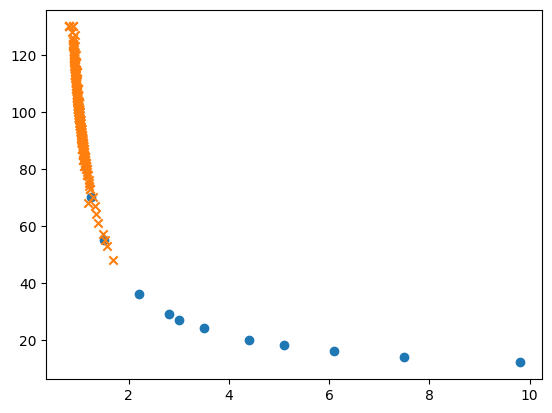

In [30]:
plt.scatter(x=d[:, 0], y=d[:, 1])
plt.scatter(x=X_raw['INR'], y=X_raw['Quick'], marker='x')

In [19]:
y = Y['90d_mortality']
y_val = Y_val['90d_mortality']

In [47]:
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.svm import LinearSVC

In [34]:
model = LinearSVC(C=1, penalty="l1", dual=False, max_iter=5000, verbose=1)

In [48]:
selection = SelectFromModel(LinearSVC(C=1, penalty="l1", dual=False, max_iter=5000))
select_k_best = SelectKBest(k=25)

In [49]:
selection.fit(X, y)
select_k_best.fit(X, y)

SelectKBest(k=25)

In [45]:
feature_names = X.columns

In [43]:
selection.get_support()

array([False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [46]:
feature_names[selection.get_support()]

Index(['Cerebrovascular_disease', 'Chronic_pulmonary_disease',
       'Congestive_heart_failure', 'Diabetes_with_chronic_complications',
       'Metastatic_solid_tumor', 'Myocardial_infarction',
       'Peptic_ulcer_disease', 'Peripheral_vascular_disease', 'Histologie_2',
       'Histologie_3', 'Lokalisation_mittlerer_thorakaler_ Abschnitt',
       'Lokalisation_unterer_thorakaler_Abschnitt', 'Vorbehandlung_1',
       'Vorbehandlung_2', 'Vorbehandlung_3', 'Tpre_0', 'Tpre_T1', 'Tpre_T2',
       'Tpre_T3', 'Npre_0', 'Npre_N1', 'Npre_N2', 'Npre_N3', 'ASA_0.0',
       'ASA_3.0', 'ASA_4.0', 'GFR_0', 'GFR_NI_Std2', 'GFR_NI_Std3',
       'AgetAtSurgery', 'Groesse', 'BMI', 'Natrium', 'Kalium', 'Harnstoff',
       'Kreatinin', 'TSH', 'GPT', 'Bilirubin', 'Lipase', 'CRP', 'Hämoglobin',
       'Leukozyten', 'Thrombozyten', 'Quick', 'aPTT', 'Erythrozyten',
       'CharlsonComorbidityScore', 'Gewicht', 'gamma-GT'],
      dtype='object')

In [50]:
feature_names[select_k_best.get_support()]

Index(['Chronic_pulmonary_disease', 'Congestive_heart_failure',
       'Liver_disease_moderate_to_severe', 'Metastatic_solid_tumor',
       'Peripheral_vascular_disease', 'Renal_disease_severe',
       'Rheumatic_disease', 'Histologie_1', 'Lokalisation_cervikal',
       'Vorbehandlung_3', 'Tpre_0', 'Npre_N3', 'ASA_2.0', 'ASA_3.0', 'Natrium',
       'Kalium', 'GOT', 'Lipase', 'CRP', 'Quick', 'INR', 'aPTT',
       'Erythrozyten', 'CharlsonComorbidityScore', 'gamma-GT'],
      dtype='object')

In [56]:
from src.utils.feature_selector import FeatureSelector
import matplotlib.pyplot as plt

In [52]:
fs = FeatureSelector()

In [53]:
fs.identify_single_unique(X)

[]
0 features with a single unique value.



In [57]:
fs.plot_unique()

In [60]:
fs.unique_stats.plot.hist()

<AxesSubplot:ylabel='Frequency'>

In [61]:
plt.show()